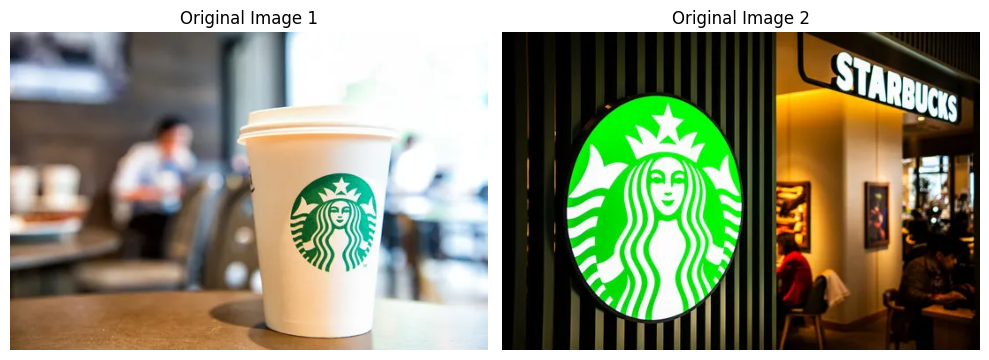

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread('image1.jpg')   # For SIFT/RANSAC
img2 = cv2.imread('image2.jpg')

# Convert BGR to RGB for correct display in matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Show original images
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.title('Original Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


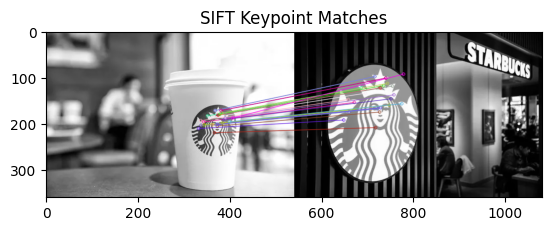

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

img_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.imshow(img_matches)
plt.title("SIFT Keypoint Matches")
plt.show()


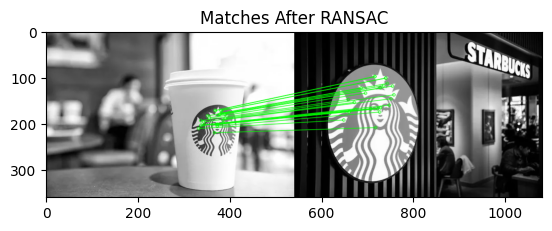

In [25]:
if len(good) > 4:
    src_pts = np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    draw_params = dict(matchColor=(0,255,0), singlePointColor=None, matchesMask=matchesMask, flags=2)
    img_ransac = cv2.drawMatches(img1, kp1, img2, kp2,
                             [m[0] for m in good], None,
                             matchColor=(0,255,0),
                             matchesMask=matchesMask,
                             flags=2)


    plt.imshow(img_ransac)
    plt.title("Matches After RANSAC")
    plt.show()




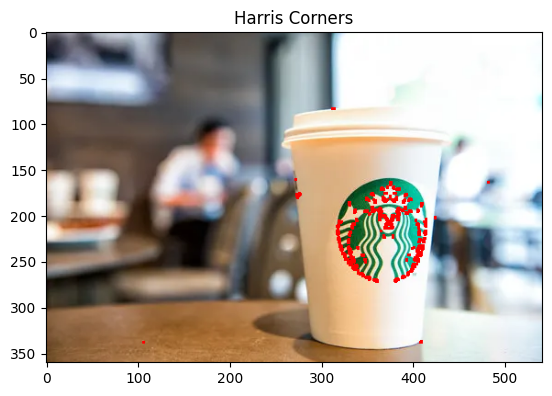

In [27]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners")
plt.show()
